## Classification model과 confusion matrix histogram 간의 관계

In [229]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [230]:
train = pd.read_csv('../Data/kaggle/train.csv')

In [231]:
train.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
143,144,0,3,"Burke, Mr. Jeremiah",male,19.0,0,0,365222,6.75,NaN,Q


In [232]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Preprocessing

In [233]:
train['Sex'] = train['Sex'].replace('female', 1).replace('male', 0)
train['Family'] = train['SibSp'] + train['Parch'] + 1

In [234]:
train.loc[train['Embarked'].isnull(), 'Embarked'] = 'S'

In [235]:
train = pd.concat([train, pd.get_dummies(train['Embarked'])], axis=1)

### Split train validation

In [236]:
features = ['Pclass', 'Sex', 'Family', 'C', 'Q', 'S']

In [237]:
X = train[features]
y = train['Survived']

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Make classification model

In [239]:
tree = DecisionTreeClassifier(random_state=42)

In [240]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [241]:
prediction = tree.predict(X_test)

In [242]:
prediction_proba = tree.predict_proba(X_test)[:,1]

In [243]:
y_test = pd.DataFrame(y_test)
y_test.columns = ['Actual']

In [244]:
y_test['Predict'] = prediction
y_test['Predict_proba'] = prediction_proba

### Confusion Matrix

In [245]:
y_test.groupby(['Actual', 'Predict']).size()

Actual  Predict
0       0          97
        1           8
1       0          27
        1          47
dtype: int64

### 시각화

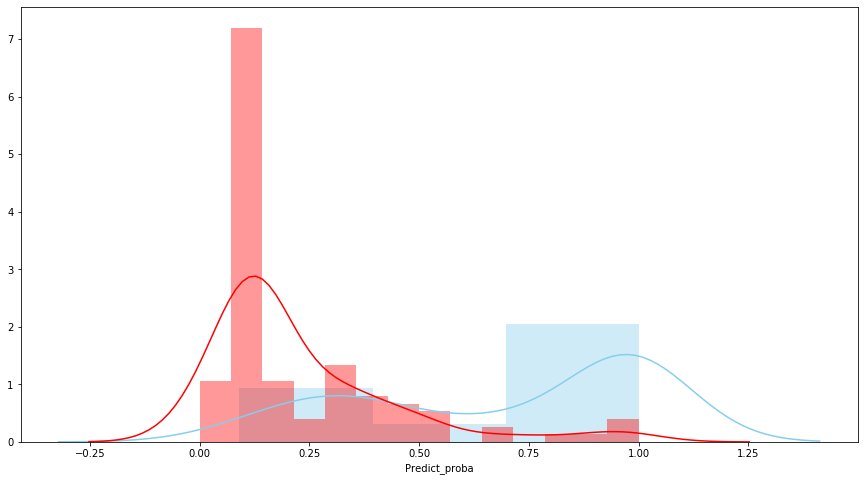

In [246]:
plt.figure(figsize=(15, 8))
sns.distplot(y_test[y_test['Actual']==1]['Predict_proba'], color="skyblue", label="Survived")
sns.distplot(y_test[y_test['Actual']==0]['Predict_proba'], color="Red", label="Dead")

### 미션
* 위의 모델보다 Accuracy가 좋은 모델을 만들고, displot 생김새를 비교해보세요.

In [247]:
# Answer

* Threshold를 움직여가면서 ROC 커브상 좌표를 몇 개만 찾아보세요.

In [248]:
# Answer